# 1. Importing libraries

In [110]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import graphviz
from sklearn import datasets
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from matplotlib.pyplot import figure

# 2. Importing data

In [111]:
path = r'C:\Users\thoma\OneDrive\Dokumente\data analytics\ML_Ach1\ClimateWins'

In [112]:
path

'C:\\Users\\thoma\\OneDrive\\Dokumente\\data analytics\\ML_Ach1\\ClimateWins'

In [113]:
Weather_stations = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'Scaled_weather_stations.pkl'))
Pleasant_weather = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'Pleasant_weather.pkl'))

In [114]:
Weather_stations.head()

,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,0.660514,-0.02793,0.826097,-0.001949,-1.101066,-0.265148,-0.179228,-0.902918,-0.528623,-0.845652,...,-0.443701,0.761754,-1.299744,-0.806427,-0.088407,-0.024706,0.372147,-0.668215,-0.519743,-0.752237
1,0.244897,-0.02793,0.735760,-0.001949,-1.058108,1.658760,-0.179228,-0.810126,-0.582946,-0.462450,...,0.783085,1.183580,-1.262455,-1.042055,0.503361,-0.024706,-0.829285,-0.548046,-0.629054,-0.407141
2,1.076130,-0.02793,1.277781,-0.001949,-1.251420,0.155707,-0.179228,-1.065304,-0.257010,-0.186545,...,0.783085,1.183580,-0.432779,-1.136306,-0.396127,-0.024706,-1.009500,-0.067372,0.054135,-0.177078
3,-1.001953,-0.02793,1.458455,-0.001949,-0.821838,-0.445514,-0.179228,-0.114186,-0.555784,-0.385810,...,0.783085,0.480538,0.387574,-1.183432,0.669056,-0.024706,-1.039536,-0.998679,-0.164486,-0.838511
4,0.244897,-0.02793,1.729466,-0.001949,-0.746661,-0.164944,-0.179228,0.187388,-1.003946,-1.075573,...,-1.670486,-0.363113,1.729970,-0.794645,-0.490810,-0.024706,0.672505,-1.509396,-1.339569,-1.471186


In [115]:
Pleasant_weather.head()

,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# 3. Decision tree algorithm

In [116]:
# Creating 'X' & 'y'
X = Weather_stations
y = Pleasant_weather

In [117]:
print(X.shape)
print(y.shape)

(22950, 147)
(22950, 15)


In [118]:
# Splitting the data set & setting a seed
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [119]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 147)
(5738, 147)
(17212, 15)
(5738, 15)


[Text(0.3682012126483305, 0.9807692307692307, 'x[49] <= 0.403\ngini = 0.316\nsamples = 17212\nvalue = [[12948, 4264]\n[11182, 6030]\n[11619, 5593]\n[13854, 3358]\n[13509, 3703]\n[13421, 3791]\n[14361, 2851]\n[12379, 4833]\n[13622, 3590]\n[9535, 7677]\n[13637, 3575]\n[14492, 2720]\n[17212, 0]\n[14290, 2922]\n[16314, 898]]'),
 Text(0.06382618365782922, 0.9423076923076923, 'x[98] <= -0.216\ngini = 0.099\nsamples = 10778\nvalue = [[10106.0, 672.0]\n[9045.0, 1733.0]\n[9508.0, 1270.0]\n[10688.0, 90.0]\n[10778.0, 0.0]\n[10142.0, 636.0]\n[10697.0, 81.0]\n[9817.0, 961.0]\n[10710.0, 68.0]\n[8023.0, 2755.0]\n[10368.0, 410.0]\n[10511.0, 267.0]\n[10778.0, 0.0]\n[10529.0, 249.0]\n[10616.0, 162.0]]'),
 Text(0.21601369815307986, 0.9615384615384615, 'True  '),
 Text(0.018164280401636295, 0.9038461538461539, 'x[19] <= 0.053\ngini = 0.028\nsamples = 7558\nvalue = [[7435.0, 123.0]\n[6871.0, 687.0]\n[7205.0, 353.0]\n[7545.0, 13.0]\n[7558.0, 0.0]\n[7519.0, 39.0]\n[7537.0, 21.0]\n[7340.0, 218.0]\n[7536.0, 22

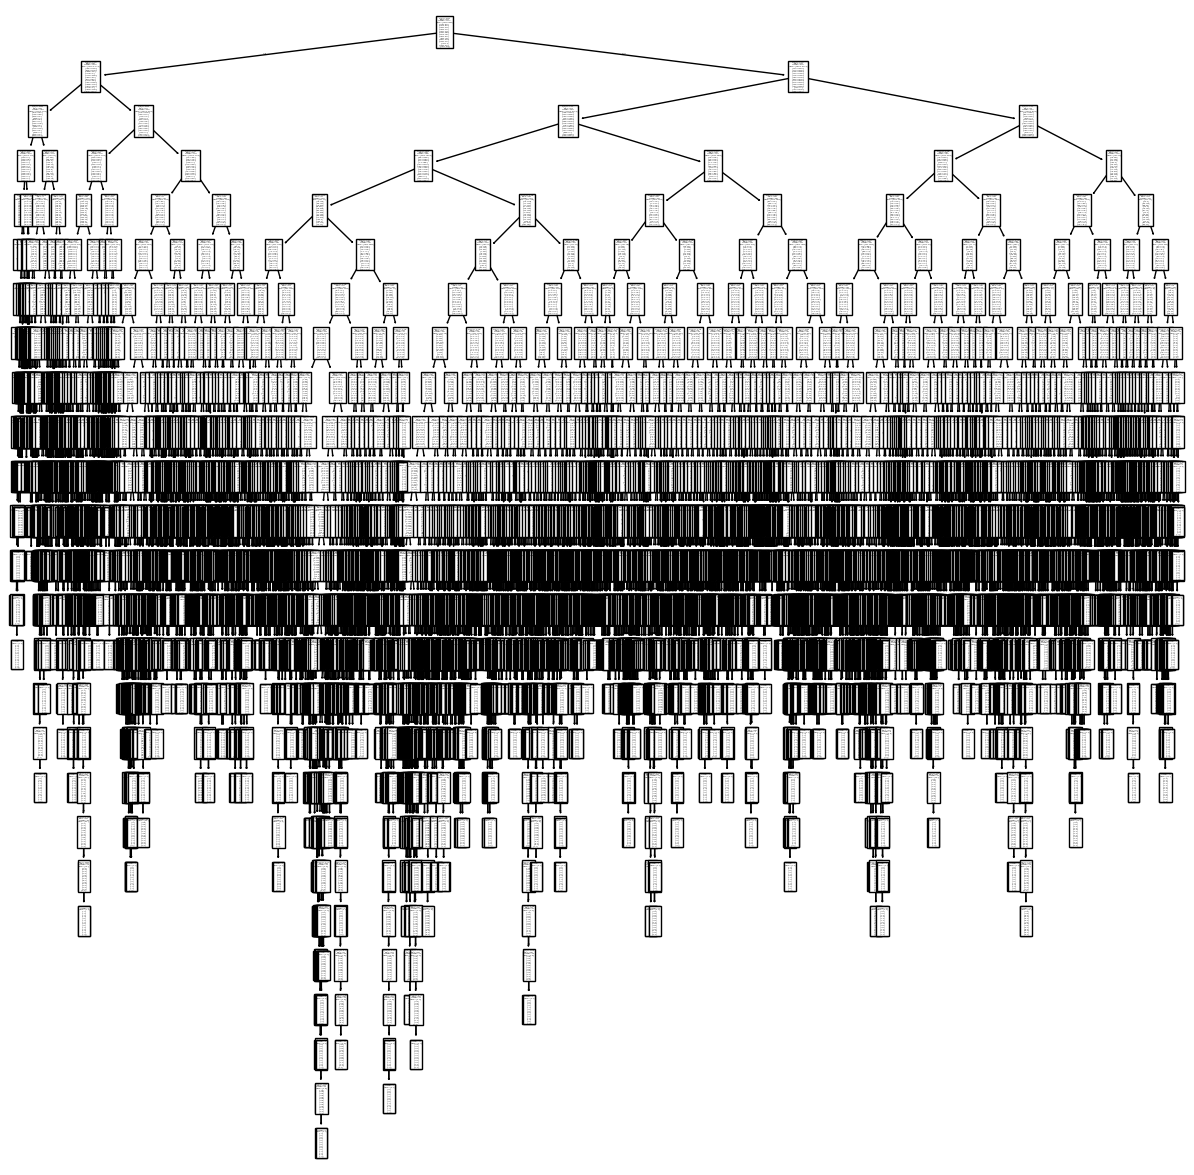

In [120]:
# Running Decision Tree classifier
Weather = DecisionTreeClassifier(criterion='gini', min_samples_split=2)
Weather.fit(X_train, y_train)
figure(figsize=(15,15))
tree.plot_tree(Weather)

In [121]:
# Training accuracy score using the cross validation method
y_pred_train = Weather.predict(X_train)
print('Train accuracy score: ',cross_val_score(Weather, X_train, y_train, cv = 3, scoring='accuracy').mean())

Train accuracy score:  0.6034743681943743


# Cross-validated (average) train accuracy is not great, the model is not performing well on unseen slices of the training data. It's likely to be underfitting and needs to be adjusted.

In [123]:
# Testing accuracy score using the cross validation method
y_pred = Weather.predict(X_test)
print('Test accuracy score: ',accuracy_score(y_test, y_pred))
multilabel_confusion_matrix(y_test, y_pred)

Test accuracy score:  0.631056117113977


array([[[4138,  200],
        [ 176, 1224]],

       [[3645,  131],
        [ 105, 1857]],

       [[3757,  143],
        [ 152, 1686]],

       [[4415,  222],
        [ 199,  902]],

       [[4476,   31],
        [  37, 1194]],

       [[4287,  283],
        [ 242,  926]],

       [[4666,  149],
        [ 142,  781]],

       [[4140,   55],
        [  42, 1501]],

       [[4330,  232],
        [ 183,  993]],

       [[2998,  170],
        [ 121, 2449]],

       [[4399,  147],
        [ 157, 1035]],

       [[4727,  152],
        [ 131,  728]],

       [[5738,    0],
        [   0,    0]],

       [[4519,  247],
        [ 267,  705]],

       [[5274,  188],
        [ 181,   95]]], dtype=int64)

# Test accuracy score seems slightly better.

C:\Users\thoma\Documents\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


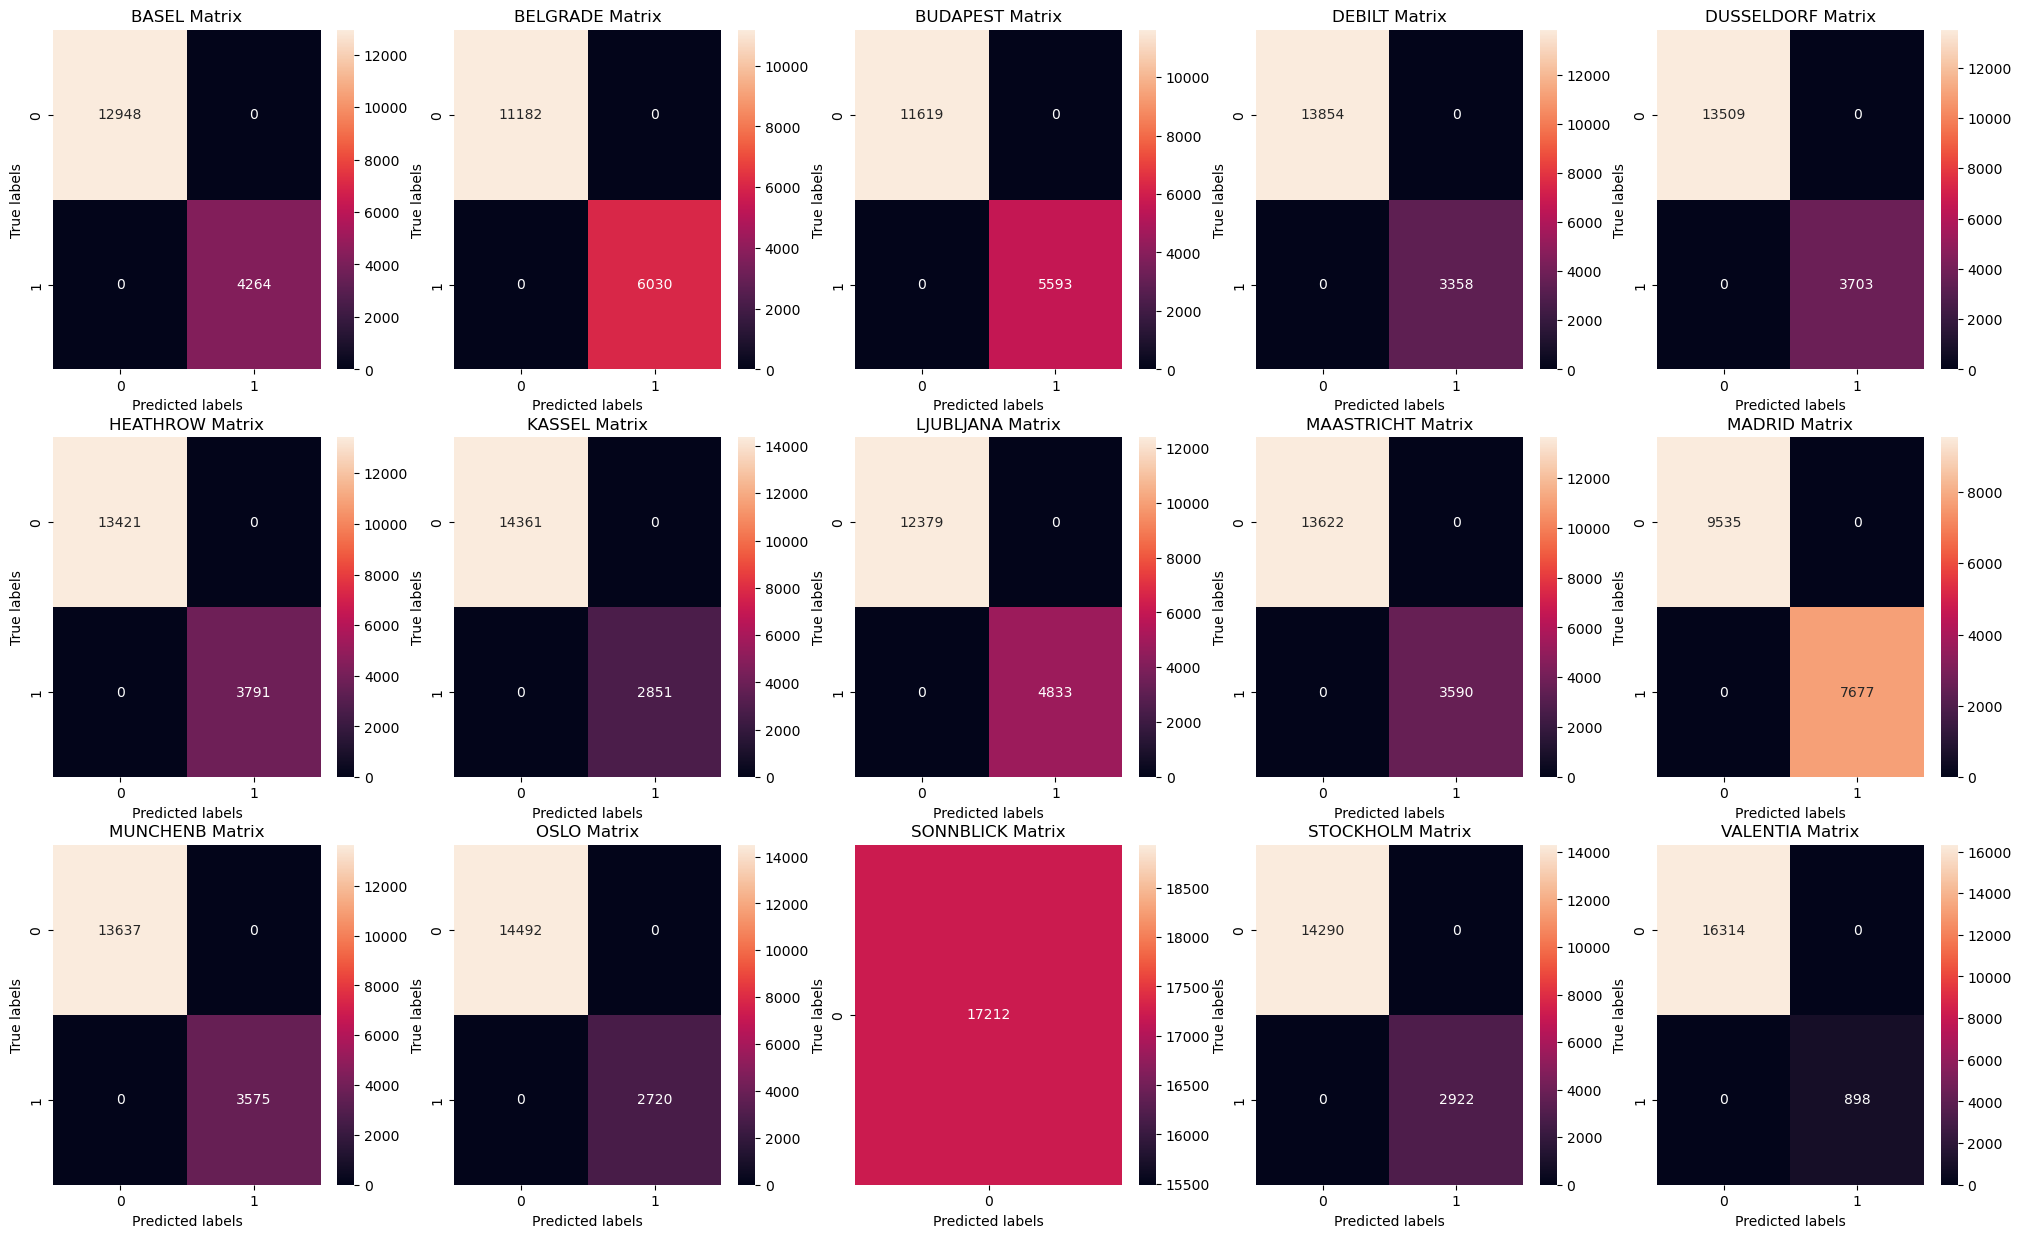

In [126]:
# Confusion matrix on the training data - displaying multiple confusion matrices at once
locations = list({x.split("_")[0] for x in X.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_train.loc[:,name+key], y_pred_train[:,count])
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix');
        count+=1

# The confusion matrix shows 100% recall and precision rates over all of the weather stations.

# Model parameters need to be adjusted to improve the outcome/accuracy of the model.

C:\Users\thoma\Documents\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


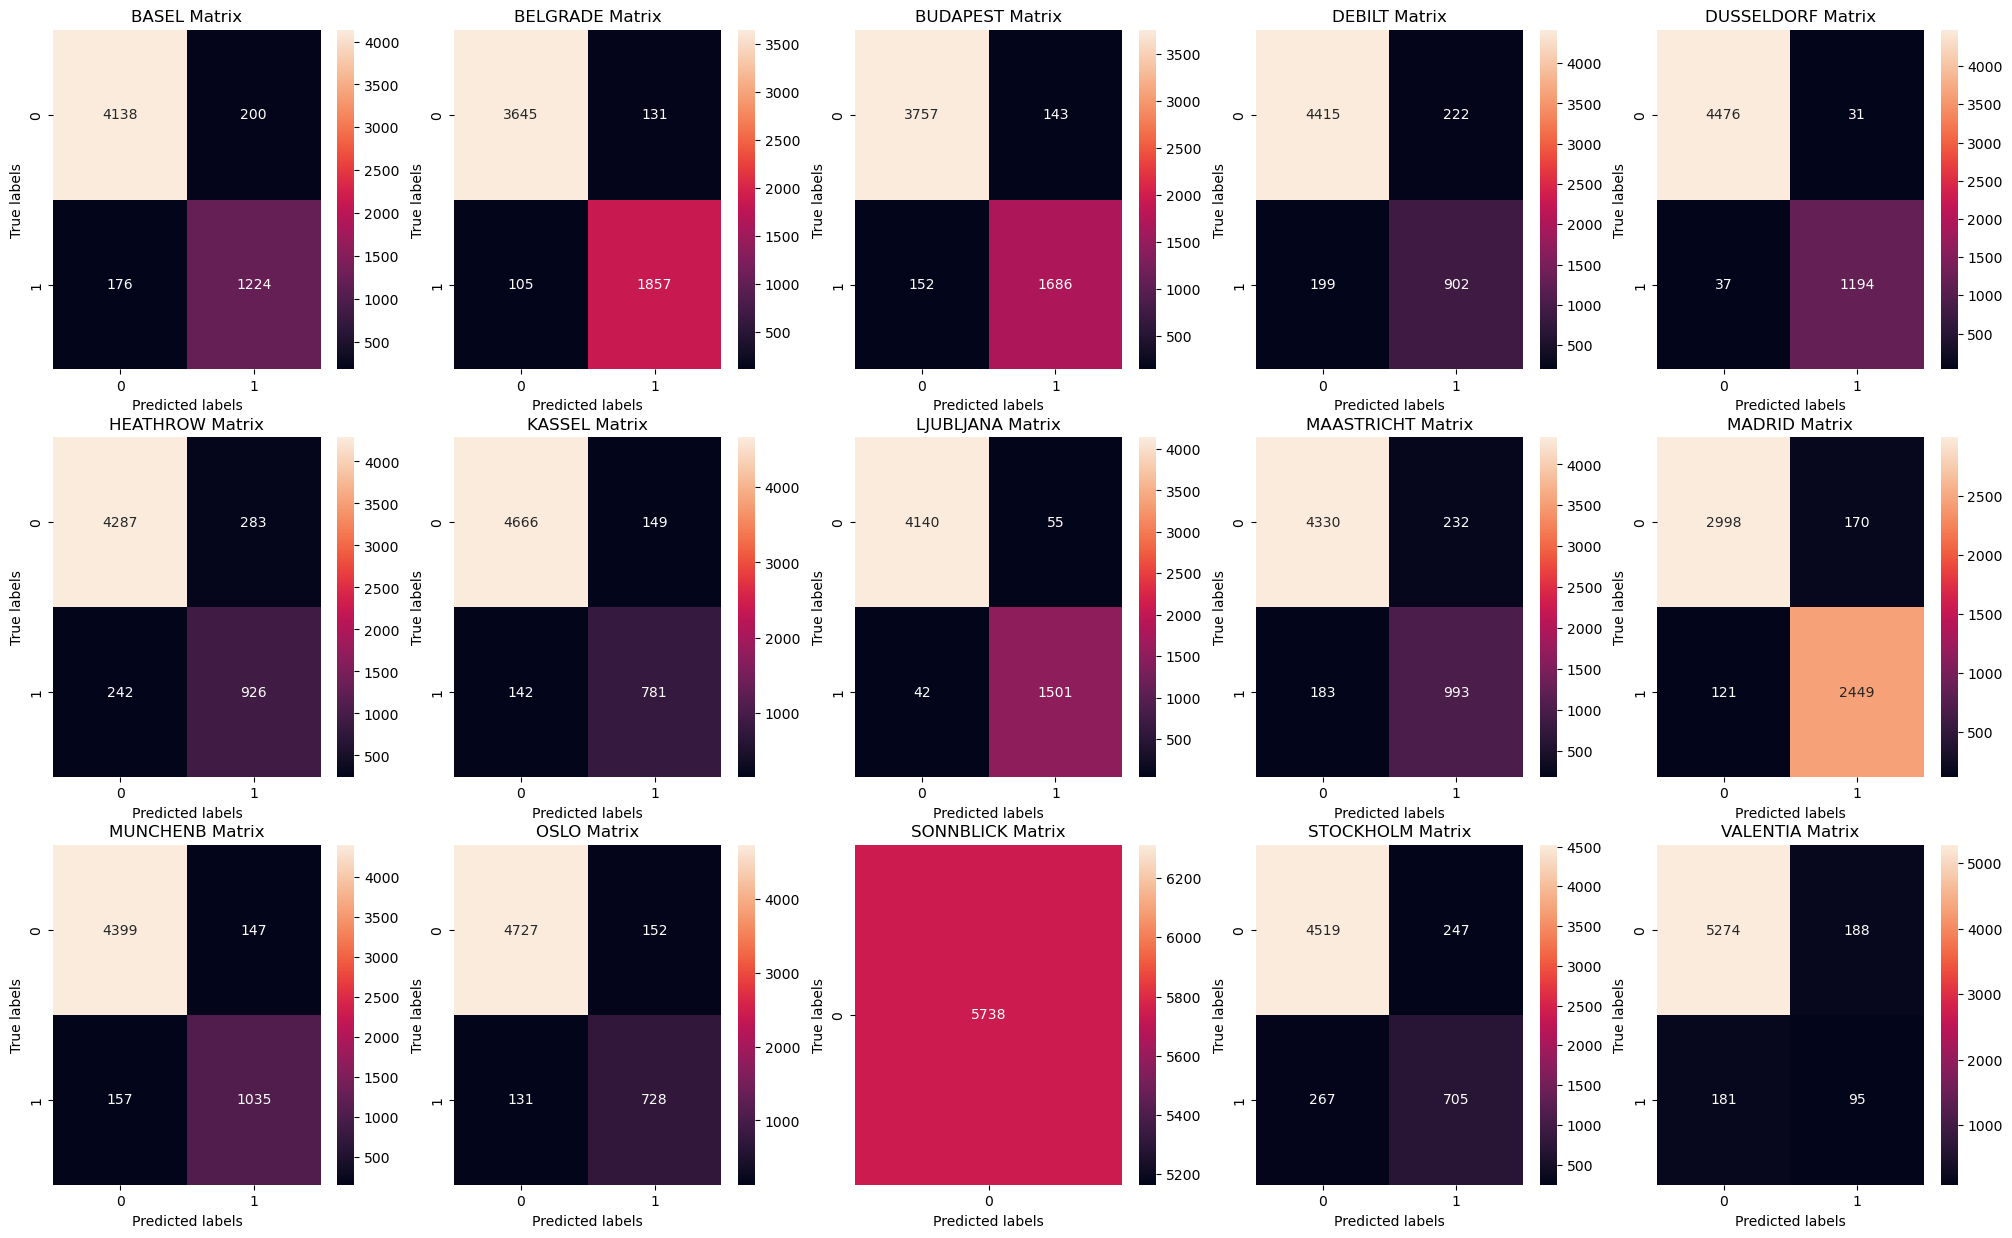

In [125]:
# Multi-station confusion matrix on the testing data - displaying multiple confusion matrices at once
locations = list({x.split("_")[0] for x in X.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred[:,count])
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix');
        count+=1

# The algorithm is not performing well, with rather low recall and precision rates.

# → e.g. the Stockholm weather station is missing 267 (false negative) out of a total of 972 truly “pleasant” observations (low recall)
# → and is showing lots of false positive ones (low precision),
# with 247 truly “unpleasant” observations out of a total of 952 predicted “pleasant” observations

# → Recall rate of about 72%
# → Precision rate of about 74%